# <center>AIML Capstone Project - Industrial safety. NLP based Chatbot.</center>

<a id="table-of-contents"></a>
## Table of Contents

1. [Overview](#overview)
2. [Import the necessary libraries](#import-libraries)
3. [Data Collection](#data-collection)
4. [Data Pre-processing](#Data-pre-processing)
5. [EDA (Data Analysis and Preparation)](#eda)
    - [Univariate Analysis](#univariate-analysis)
    - [Bivariate Analysis](#bivariate-analysis)
    - [Multivariate Analysis](#multivariate-analysis)
6. [NLP Pre-processing](#nlp-pre-processing)
    - [Word Cloud](#wordcloud)

<a id="overview"></a>
## 1. Overview

### Domain - Industrial safety. NLP based Chatbot.

### Context:

The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

### Data Description:

This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.

**Columns description:**

- **Data**: timestamp or time/date information
- **Countries**: which country the accident occurred (anonymised)
- **Local**: the city where the manufacturing plant is located (anonymised)
- **Industry sector**: which sector the plant belongs to
- **Accident level**: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
- **Potential Accident Level**: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
- **Genre**: if the person is male of female
- **Employee or Third Party**: if the injured person is an employee or a third party
- **Critical Risk**: some description of the risk involved in the accident
- **Description**: Detailed description of how the accident happened.

Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

[Table of Contents](#table-of-contents)

<a id="import-libraries"></a>
## 2. Import the necessary libraries

In [1]:
!pip install unidecode
!pip install autocorrect
!pip install google_trans_new
!pip install ann_visualizer
!pip install googletrans

You should consider upgrading via the 'c:\users\abhishek\anaconda3\python.exe -m pip install --upgrade pip' command.


  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=f960d8c41e4c059820a55511f9c869268cb9374415ea13566a8d1c76de429b71
  Stored in directory: c:\users\abhishek\appdata\local\pip\cache\wheels\72\b8\3b\a90246d13090e85394a8a44b78c8abf577c0766f29d6543c75
Successfully built autocorrect


You should consider upgrading via the 'c:\users\abhishek\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\abhishek\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\abhishek\anaconda3\python.exe -m pip install --upgrade pip' command.


  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=d992e49d885852ed1a1ffd1703841bf0250e0f48fe0917fce242368989231208
  Stored in directory: c:\users\abhishek\appdata\local\pip\cache\wheels\4b\ef\77\9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann-visualizer


You should consider upgrading via the 'c:\users\abhishek\anaconda3\python.exe -m pip install --upgrade pip' command.


  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=993c3d200465ee585d4b027033f5ff4db2783a2d2049924b9a2b0faef8751197
  Stored in directory: c:\users\abhishek\appdata\local\pip\cache\wheels\0e\ce\9b\d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans


In [3]:
# Importing all the necessary libraries
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk import tokenize, stem
from tensorflow.keras.preprocessing.text import Tokenizer

import re
import string
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import unicodedata
import unidecode
from autocorrect import Speller
from string import punctuation
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

from keras.callbacks import EarlyStopping, ModelCheckpoint

from google_trans_new import google_translator  

from ann_visualizer.visualize import ann_viz;
from keras.utils.vis_utils import plot_model


ModuleNotFoundError: No module named 'regex._regex'

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger');

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<a id="data-collection"></a>
## 3. Data Collection

In [2]:
path = r'C:\Users\Abhishek\Documents\AI\Capstone_Project\Data Set - industrial_safety_and_health_database_with_accidents_description.csv'
df = pd.read_csv(path)

df.head(10)

NameError: name 'pd' is not defined

In [5]:
# Drop irrelevant column Unnamed:0
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# Rename the columns in a correct fashion
df.rename(columns = { 'Data' : 'Date',
                      'Industry Sector' : 'Industry_Sector', 
                      'Accident Level': 'Accident_Level',
                      'Countries' : 'Country',
                      'Genre' : 'Gender',
                      'Potential Accident Level' : 'Potential_Accident_Level',
                      'Employee or Third Party' : 'Employee_Type', 
                      'Critical Risk' : 'Critical_Risk'}, inplace = True)

In [7]:
# Defining a function which gives the dataframe with all the analysis.
def indetailtable(df):
    print('Dataset Shape: {}'.format(df.shape))
    print('Total Number of rows in dataset: {}'.format(df.shape[0]))
    print('Total Number of columns in dataset: {}'.format(df.shape[1]))
    print('Various datatypes present in the dataset are: {}'.format(df.dtypes.value_counts()))
    
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary['Name'] = summary[['Name', 'dtypes']]
    summary['Misssing_values'] = df.isnull().sum().values
    summary['Unique_values'] = df.nunique().values
    summary['Duplicate_values'] = df.duplicated().sum()
    summary['1st value'] = df.loc[0].values
    summary['2nd Value'] = df.loc[1].values
    summary['423th Value'] = df.iloc[-2].values
    summary['424th Value'] = df.iloc[-1].values
    
    return summary

In [8]:
# Calling the above defined function by giving the input as a dataframe
indetailtable(df)

Dataset Shape: (425, 10)
Total Number of rows in dataset: 425
Total Number of columns in dataset: 10
Various datatypes present in the dataset are: object    10
dtype: int64


,index,dtypes,Name,Misssing_values,Unique_values,Duplicate_values,1st value,2nd Value,423th Value,424th Value
0,Date,object,Date,0,287,7,2016-01-01 00:00:00,2016-01-02 00:00:00,2017-07-06 00:00:00,2017-07-09 00:00:00
1,Country,object,Country,0,3,7,Country_01,Country_02,Country_02,Country_01
2,Local,object,Local,0,12,7,Local_01,Local_02,Local_05,Local_04
3,Industry_Sector,object,Industry_Sector,0,3,7,Mining,Mining,Metals,Mining
4,Accident_Level,object,Accident_Level,0,5,7,I,I,I,I
5,Potential_Accident_Level,object,Potential_Accident_Level,0,6,7,IV,IV,II,II
6,Gender,object,Gender,0,2,7,Male,Male,Male,Female
7,Employee_Type,object,Employee_Type,0,3,7,Third Party,Employee,Employee,Third Party
8,Critical_Risk,object,Critical_Risk,0,33,7,Pressed,Pressurized Systems,Cut,Fall prevention (same level)
9,Description,object,Description,0,411,7,While removing the drill rod of the Jumbo 08 f...,During the activation of a sodium sulphide pum...,The Employee performed the activity of strippi...,"At 10:00 a.m., when the assistant cleaned the ..."


## Data Collection Summary:

1. There are about 425 rows and 11 columns in the dataset.
2. We noticed that except a 'date' column all other columns are categorical columns.

**Insights:**

* Dataset contains total of 10 columns in which all are object data type.
* There are no null / missing values present in the dataset, hence we can safely move ahead.
* There are 7 duplicates for which all the columns have same value, These duplicate records refer to different persons involved in the same accident.There are only 7 records hence we will be dropping them down the line. As capturing the number of people will not be helpful in our analysis.


[Table of Contents](#table-of-contents)

<a id="Data-pre-processing"></a>
## 4.  Data pre-processing

In [9]:
# Checking those the duplicates we found in above dataframe
print('There are {} duplicates in the dataset as below'.format(df.duplicated().sum()))
df[df.duplicated()]

There are 7 duplicates in the dataset as below


,Date,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


In [10]:
# Drop the duplicate values from the dataframe using drop_duplicates function.
df.drop_duplicates(inplace=True)
print('After removing duplicates the shape of the dataset is:',df.shape)

After removing duplicates the shape of the dataset is: (418, 10)


In [11]:
# Calling the function again to get some more insights
indetailtable(df)

Dataset Shape: (418, 10)
Total Number of rows in dataset: 418
Total Number of columns in dataset: 10
Various datatypes present in the dataset are: object    10
dtype: int64


,index,dtypes,Name,Misssing_values,Unique_values,Duplicate_values,1st value,2nd Value,423th Value,424th Value
0,Date,object,Date,0,287,0,2016-01-01 00:00:00,2016-01-02 00:00:00,2017-07-06 00:00:00,2017-07-09 00:00:00
1,Country,object,Country,0,3,0,Country_01,Country_02,Country_02,Country_01
2,Local,object,Local,0,12,0,Local_01,Local_02,Local_05,Local_04
3,Industry_Sector,object,Industry_Sector,0,3,0,Mining,Mining,Metals,Mining
4,Accident_Level,object,Accident_Level,0,5,0,I,I,I,I
5,Potential_Accident_Level,object,Potential_Accident_Level,0,6,0,IV,IV,II,II
6,Gender,object,Gender,0,2,0,Male,Male,Male,Female
7,Employee_Type,object,Employee_Type,0,3,0,Third Party,Employee,Employee,Third Party
8,Critical_Risk,object,Critical_Risk,0,33,0,Pressed,Pressurized Systems,Cut,Fall prevention (same level)
9,Description,object,Description,0,411,0,While removing the drill rod of the Jumbo 08 f...,During the activation of a sodium sulphide pum...,The Employee performed the activity of strippi...,"At 10:00 a.m., when the assistant cleaned the ..."


* One can observe in the above dataframe that there are only 411 unique values in the Description column but we have 418 number of records in total, we can assume that there are still 7 number of duplicate values on description column.
We will check for those duplicates on column level and drop if required for further analysis.

In [12]:
# Printing all the duplicate values (keep=False)
print('There are still {} duplicates in the dataset as below'.format(df.duplicated(subset=['Description'],keep=False).sum()))
df[df.duplicated(subset=['Description'],keep=False)].sort_values(by='Description')

There are still 14 duplicates in the dataset as below


,Date,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
166,2016-07-07 00:00:00,Country_01,Local_03,Mining,IV,V,Male,Third Party,Others,At moments when the MAPERU truck of plate F1T ...
167,2016-07-07 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,At moments when the MAPERU truck of plate F1T ...
261,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
263,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
412,2017-06-20 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Employee,Others,"In circumstance, the AHK-903 license plate (Em..."
413,2017-06-20 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Others,"In circumstance, the AHK-903 license plate (Em..."
130,2016-05-26 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,"In the geological reconnaissance activity, in ..."
131,2016-05-26 00:00:00,Country_03,Local_10,Others,I,I,Male,Employee,Others,"In the geological reconnaissance activity, in ..."
143,2016-06-08 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,Project of Vazante that carried out sediment c...
144,2016-06-08 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Others,Project of Vazante that carried out sediment c...


* We can cleary observe that the above dataframe contains 7 duplicates in which only one or two column values are dissimilar among the datapoints where in the Description is matching, which is logically unsound.
* It can also be noticed that the incidents which are having duplicate values happened on the time stamp(Date Column).
* Hence we will be dropping these hidden duplicates which doesn't seem right logically.

In [13]:
# Dropping the duplicates we detected above.
df.drop_duplicates(subset=['Description'], keep='first', inplace=True)
print('After removing duplicates the shape of the dataset is:', df.shape)

After removing duplicates the shape of the dataset is: (411, 10)


In [14]:
# Calling the function again to verify everything is correct.
indetailtable(df)

Dataset Shape: (411, 10)
Total Number of rows in dataset: 411
Total Number of columns in dataset: 10
Various datatypes present in the dataset are: object    10
dtype: int64


,index,dtypes,Name,Misssing_values,Unique_values,Duplicate_values,1st value,2nd Value,423th Value,424th Value
0,Date,object,Date,0,287,0,2016-01-01 00:00:00,2016-01-02 00:00:00,2017-07-06 00:00:00,2017-07-09 00:00:00
1,Country,object,Country,0,3,0,Country_01,Country_02,Country_02,Country_01
2,Local,object,Local,0,12,0,Local_01,Local_02,Local_05,Local_04
3,Industry_Sector,object,Industry_Sector,0,3,0,Mining,Mining,Metals,Mining
4,Accident_Level,object,Accident_Level,0,5,0,I,I,I,I
5,Potential_Accident_Level,object,Potential_Accident_Level,0,6,0,IV,IV,II,II
6,Gender,object,Gender,0,2,0,Male,Male,Male,Female
7,Employee_Type,object,Employee_Type,0,3,0,Third Party,Employee,Employee,Third Party
8,Critical_Risk,object,Critical_Risk,0,33,0,Pressed,Pressurized Systems,Cut,Fall prevention (same level)
9,Description,object,Description,0,411,0,While removing the drill rod of the Jumbo 08 f...,During the activation of a sodium sulphide pum...,The Employee performed the activity of strippi...,"At 10:00 a.m., when the assistant cleaned the ..."


* Now we can see that after removing the duplicates the count of unique values in the description column and the total number of datapoints in the dataset is matching.

<a id="eda"></a>
## 6. EDA (Data Analysis and Preparation)

In [15]:
# Just checking shape of the dataframe
data_shape = df.shape
print('Data set contains {} number of rows and {} number of columns' .format(data_shape[0], data_shape[1]))

Data set contains 411 number of rows and 10 number of columns


In [16]:
# Check the info to print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      411 non-null    object
 1   Country                   411 non-null    object
 2   Local                     411 non-null    object
 3   Industry_Sector           411 non-null    object
 4   Accident_Level            411 non-null    object
 5   Potential_Accident_Level  411 non-null    object
 6   Gender                    411 non-null    object
 7   Employee_Type             411 non-null    object
 8   Critical_Risk             411 non-null    object
 9   Description               411 non-null    object
dtypes: object(10)
memory usage: 51.5+ KB


In [17]:
# Looping through all the columns in the dataframe and checking counts of unique values.
for col in df.columns:
    if (col!='Description') and (col!='Date'):
        print(df[col].value_counts())
        print('*'*50)

Country_01    245
Country_02    127
Country_03     39
Name: Country, dtype: int64
**************************************************
Local_03    87
Local_05    59
Local_01    55
Local_04    55
Local_06    46
Local_10    39
Local_08    27
Local_02    23
Local_07    12
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64
**************************************************
Mining    232
Metals    134
Others     45
Name: Industry_Sector, dtype: int64
**************************************************
I      303
II      39
III     31
IV      30
V        8
Name: Accident_Level, dtype: int64
**************************************************
IV     138
III    106
II      95
I       43
V       28
VI       1
Name: Potential_Accident_Level, dtype: int64
**************************************************
Male      390
Female     21
Name: Gender, dtype: int64
**************************************************
Third Party             180
Employee                176
Third Party (Rem

* There are total of Three countries and Twelve plants/cities overall, 
* Three type of Industry sectors exist namely
      namely: 'Mining'⚒️, 'Metals'⚙️ and Others🤔, 
* Five type of accident levels (1 to 5) are present.
* Six type of Potential Accident Levels (1 to 6) and we see that there is only one value registered under 'Accident level 6' and   it can be replaced to level 5 to reduce the complexity
* Three type of employee types 
      namely: 'Third Party', 'Employee', 'Third Party(Remote)'
* There are about 33 critical risks in which more than half of the incidents fall under the 'Others' category, these entries have been changed to 'Others' as part of the anonymization process.
* Level VI accident is having only one incident hence it can be replaced with Level V as it is more closer one


In [18]:
# Replace Level 6 value to Level 5
df['Potential_Accident_Level'] = df['Potential_Accident_Level'].replace('VI', 'V')

# Visualization


<a id="univariate-analysis"></a>
#### Univariate Analysis

In [19]:
# Creating a function to make univariate plots for analysis
def plot(col, title, palette, edgecolor):

    value = df[col].value_counts()[1]
    plt.figure(figsize = (20,15))
    plt.subplot(2,2,1)
    sns.countplot(df[col], palette = palette, edgecolor = edgecolor, order=df[col].value_counts().index, alpha = 1.0, saturation=1);
    sns.lineplot(df[col].value_counts().index, df[col].value_counts().values, palette='seismic')
    plt.title(title);

    plt.subplot(2,2,2)
    # colors = ['yellowgreen', 'violet', 'orange', 'grey', 'cyan']

    plt.pie(df[col].value_counts(), autopct = "%.2f",
       labels = df[col].value_counts().index , shadow = True, explode = [0.1]*len(df[col].value_counts().index), startangle = -135);
    plt.title(title);
    plt.show()

### Industry Sector

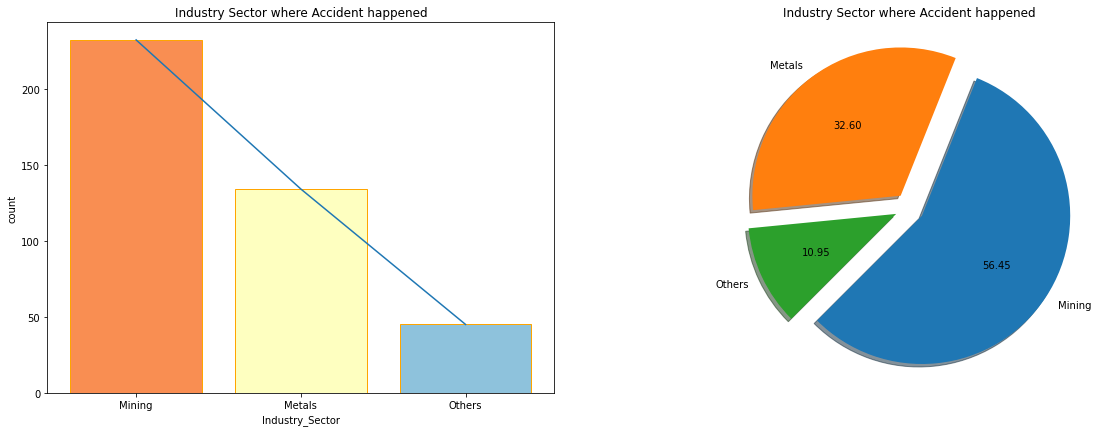

In [20]:
plot('Industry_Sector', 'Industry Sector where Accident happened', 'RdYlBu', 'orange')

* It clearly indicates that mining industries witness more accidents.
* We can say that the number of accidents in Mining Industry is considerably more than that in the Metal Industry, therefore mining job is more risky than the latter.

### Gender

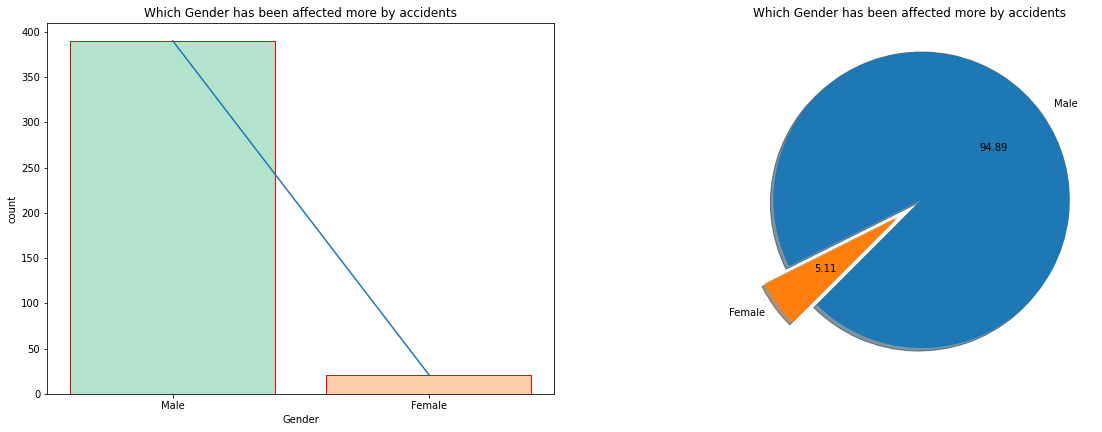

In [21]:
plot('Gender', 'Which Gender has been affected more by accidents', 'Pastel2', 'red')

* As a characteristic of the industry, the proportion of Men employees is overwhelming.
* The dataset is biased towards Male employees.

### Employee type

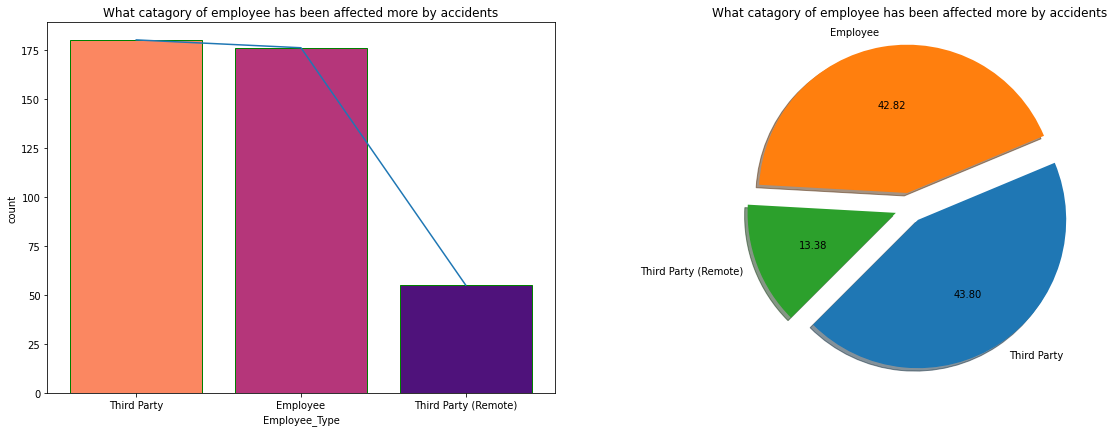

In [22]:
plot('Employee_Type', 'What catagory of employee has been affected more by accidents', 'magma_r', 'green')

* Total number of Direct Employees and Third party employees are almost same, However, Third party remote employees are less in number.



### Country

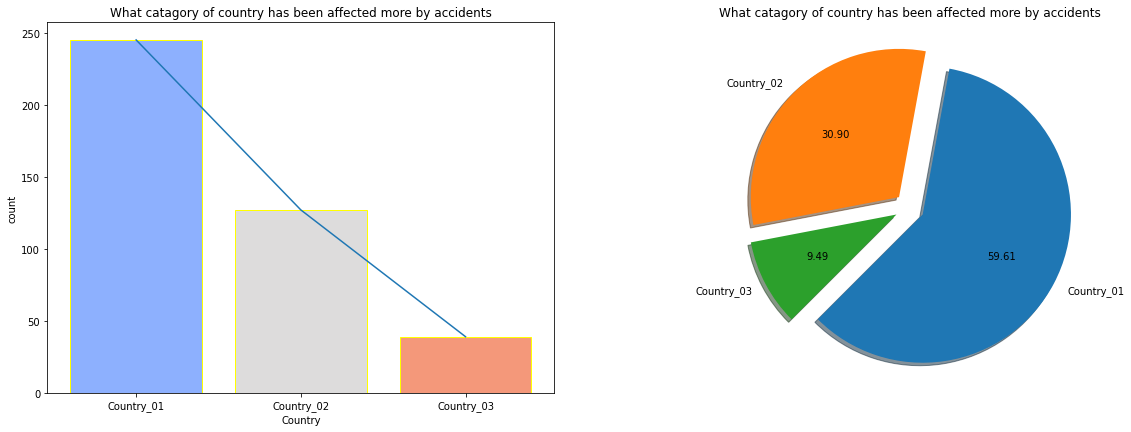

In [23]:
plot('Country', 'What catagory of country has been affected more by accidents', 'coolwarm', 'yellow')

### Local

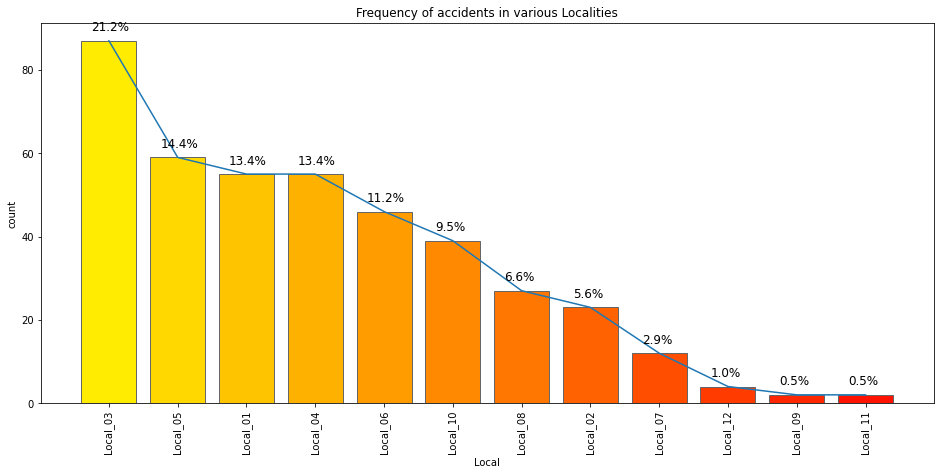

In [24]:
# Locals Count
plt.figure(figsize = (16,7))
ax = sns.countplot(x = df['Local'], order=df['Local'].value_counts().index, palette = 'autumn_r', edgecolor='.4', saturation=1);
sns.lineplot(df['Local'].value_counts().index, df['Local'].value_counts().values)

plt.title('Frequency of accidents in various Localities');
plt.xticks(rotation = 'vertical');

total = sum(df['Local'].value_counts())
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), 
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (10, 10), 
                 textcoords = 'offset points')

* Local_03 has recorded maximum number of accidents which is approx 21% of all the plants in the country.
* This is followed by Local-05, Local-01 and so on.

### Critical Risk

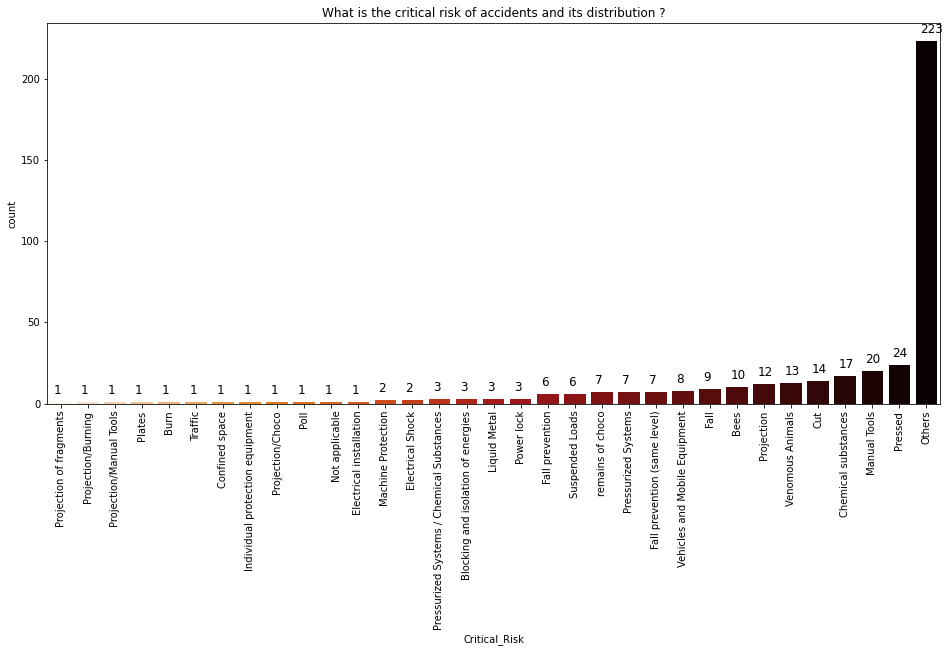

In [25]:
# Critical Risk Count
plt.figure(figsize = (16,7))
ax = sns.countplot(x = df['Critical_Risk'], order=df['Critical_Risk'].value_counts().sort_values(ascending = True).index, palette = 'gist_heat_r');
plt.title('What is the critical risk of accidents and its distribution ?');
plt.xticks(rotation = 'vertical');

total = sum(df['Critical_Risk'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), 
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (4, 8), 
                 textcoords = 'offset points')

* Most of the Critical Risks are classified as 'Others' that is almost 50% of the dataset, hence there are too many risks need to be classified precisely.
* This is followed by Pressed, Manual tools, Chemical substances, Cut etc..


### Accident Level

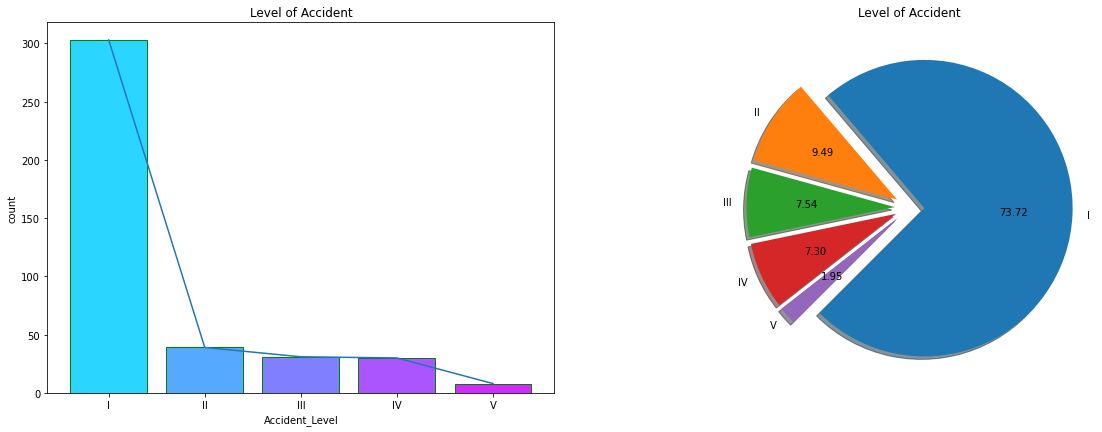

In [26]:
plot('Accident_Level', 'Level of Accident', 'cool', 'green')

* Level I ☝️ signifies not severe and V 🖐️ signifies very severe.
* Accidents with the level I are most common. These are due to small misses, like people forgot their PPE, or they dropped a tool, etc.

### Potential Accident Level

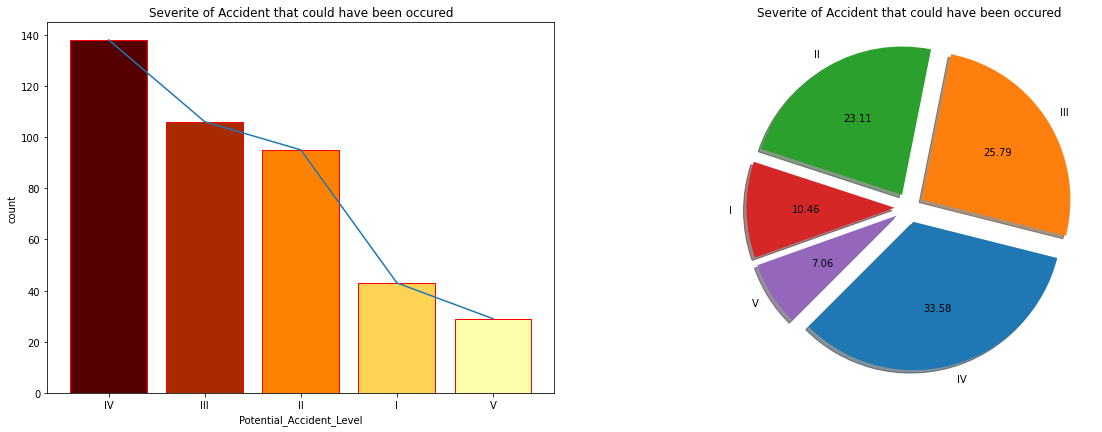

In [27]:
plot('Potential_Accident_Level', 'Severite of Accident that could have been occured', 'afmhot', 'red')

* Potential accident level indicates how severe the accident would been due to other factors involved in the accidents.
* Potential accident level IV has the highest count and signifies the moderate severity of accidents.
* We have to check the correlation of this Potential Accident level and Accident level along with the industry sector.

<a id="bivariate-analysis"></a>
#### Bivariate Analysis
* On target column

#### Potential Accident level counts by Country

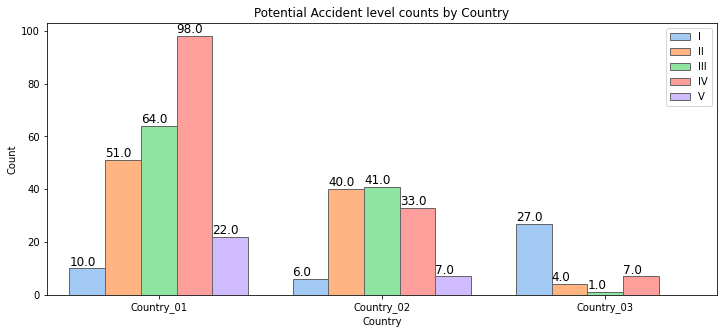

In [28]:
plt.figure(figsize=(12,5))
ax = sns.countplot(df['Country'], hue=df['Potential_Accident_Level'], hue_order=df['Potential_Accident_Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

total = sum(df['Country'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), 
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3), 
                 textcoords = 'offset points')

plt.title('Potential Accident level counts by Country');
plt.ylabel('Count');
plt.legend(loc='upper right')

* Country_01 has more number of severe accidents especially Level IV
* Country_02 has moderate accidents across all the levels
* Country_03 'level I' accidents counts is more compared to country_01 and country_02 but less severe accidents.

#### Potential Accident level counts by Local


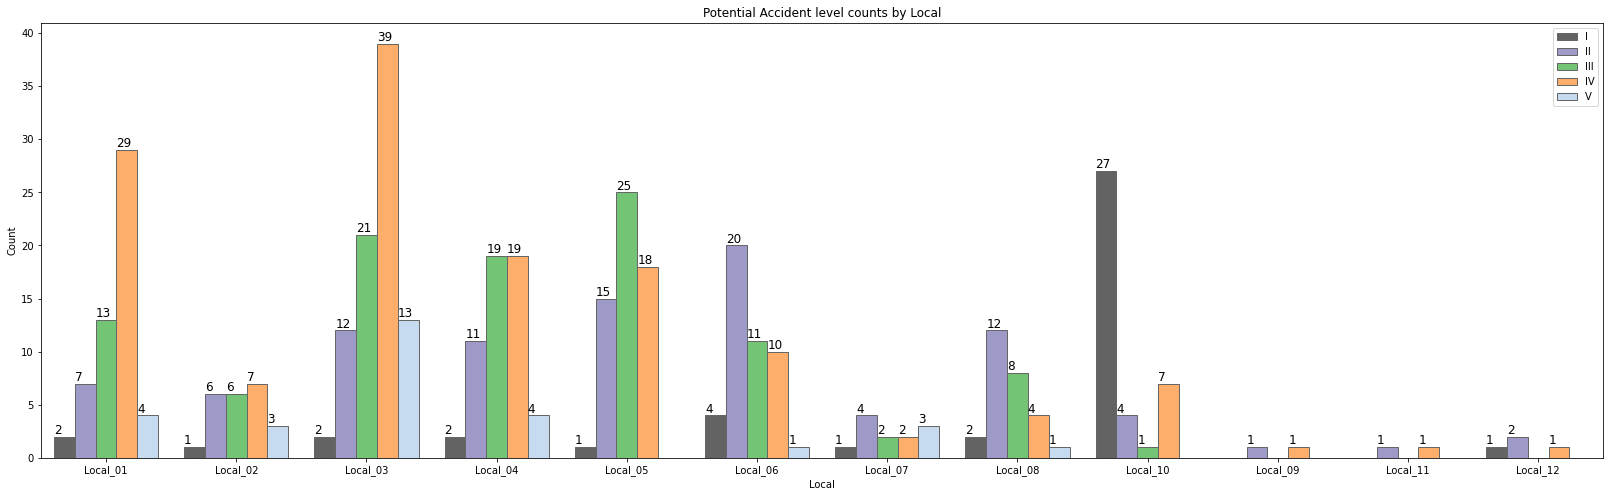

In [29]:
plt.figure(figsize=(28,8))
ax = sns.countplot(df['Local'], hue=df['Potential_Accident_Level'], hue_order=df['Potential_Accident_Level'].value_counts().sort_index().index, palette='tab20c_r', edgecolor='.4', saturation=1)

total = sum(df['Local'].value_counts())
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3), 
                 textcoords = 'offset points')

plt.title('Potential Accident level counts by Local');
plt.ylabel('Count');
plt.legend(loc='upper right')

* Local_03 (which also belongs to Country_01) is where most of the accidents happen

#### Potential Accident level counts by Industry Sector


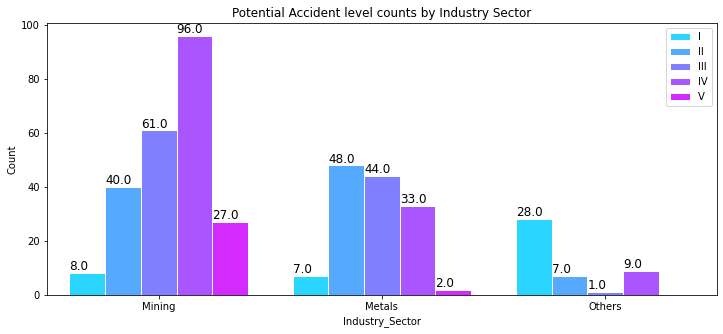

In [30]:
plt.figure(figsize=(12,5))
ax = sns.countplot(df['Industry_Sector'], hue=df['Potential_Accident_Level'], hue_order=df['Potential_Accident_Level'].value_counts().sort_index().index, palette='cool', edgecolor='1.0', saturation=1)

total = sum(df['Industry_Sector'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), 
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3), 
                 textcoords = 'offset points')

plt.title('Potential Accident level counts by Industry Sector');
plt.ylabel('Count');
plt.legend(loc='upper right')

* Out of all industries, Mining Industry has seen some accidents whose level is 
the most severe and the corresponding potential Accident level is also highest.
* This is followed by Metal industry and other.
* Severity levels of the incidents are more in Mining sector (rate of level 4 is slightly higher than the level 2 & 3)


#### Potential Accident level counts by Employee Type

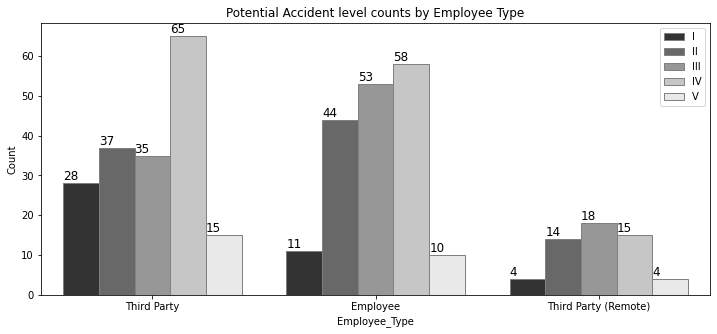

In [31]:
plt.figure(figsize=(12,5))
ax = sns.countplot(df['Employee_Type'], hue=df['Potential_Accident_Level'], hue_order=df['Potential_Accident_Level'].value_counts().sort_index().index, palette='Greys_r', edgecolor='.5', saturation=1);

total = sum(df['Employee_Type'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), 
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3), 
                 textcoords = 'offset points')

plt.title('Potential Accident level counts by Employee Type');
plt.ylabel('Count');
plt.legend(loc='upper right')

* Third Party Employees are more involved in Accidents
* We can observe that apart from Accident_Level_1 the people are also facing severe accidents (Accident_Level_IV) in the industry.

#### Potential Accident level counts by Critical Risk

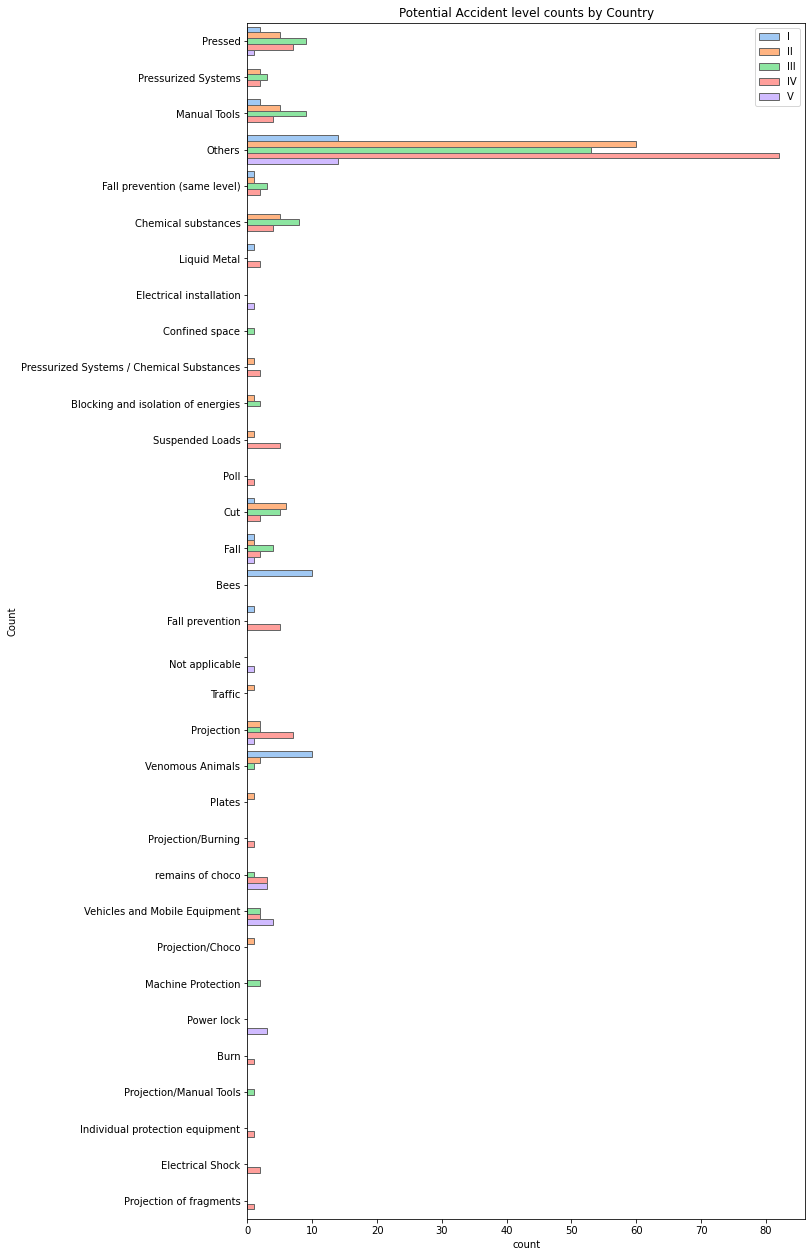

In [32]:
plt.figure(figsize=(10,22))
ax = sns.countplot(y = df['Critical_Risk'], hue=df['Potential_Accident_Level'], hue_order=df['Potential_Accident_Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

# total = sum(df['Critical_Risk'].value_counts())
# for p in ax.patches:
#     ax.annotate('{}'.format(p.get_height()), 
#                 (p.get_x(), p.get_height()),
#                  size=12,
#                  xytext = (0, 3), 
#                  textcoords = 'offset points')

plt.title('Potential Accident level counts by Country');
plt.ylabel('Count');
plt.legend(loc='upper right')

#### Potential Accident level counts with respect to Gender
###### Since Gender is more biased towards male, we are taking ratio count with respect to other variables

In [33]:
# Filtering the dataframe by Gender and Employee type and taking the count.
df1 = df.groupby(['Gender','Potential_Accident_Level'])['Potential_Accident_Level'].count()

# 1.unstack() Function in dataframe unstacks the row to columns.
# 2.applying the row total and taking the ratio of male and female employees.
# 3.resetting the index

df1 = df1.unstack().apply(lambda x: round(x / x.sum()*100), axis=1).reset_index() 
df1 = pd.melt(df1, ['Gender']).fillna(0) # melt() function unpivots a DataFrame from wide format to long format
df1

,Gender,Potential_Accident_Level,value
0,Female,I,0.0
1,Male,I,11.0
2,Female,II,67.0
3,Male,II,21.0
4,Female,III,14.0
5,Male,III,26.0
6,Female,IV,19.0
7,Male,IV,34.0
8,Female,V,0.0
9,Male,V,7.0


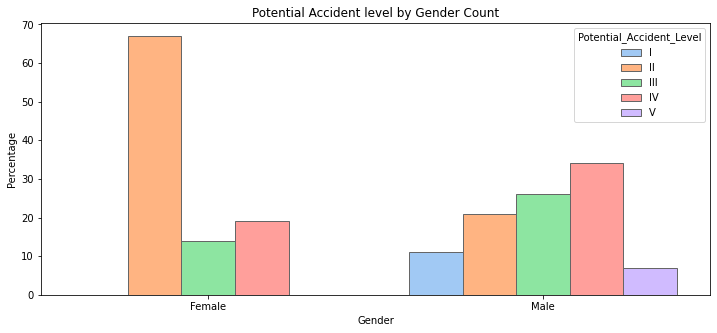

In [34]:
plt.figure(figsize=(12,5))
sns.barplot(df1['Gender'], df1['value'], hue=df1['Potential_Accident_Level'], palette='pastel', edgecolor='.4', saturation=1);
plt.title('Potential Accident level by Gender Count');
plt.ylabel('Percentage');

* Males are more involved in Severe Accidents whereas Females are suffering with less Servere ones (Level II specifically)

In [35]:
# Getting the value counts of each of the columns
accident = df['Accident_Level'].value_counts()
potential = df['Potential_Accident_Level'].value_counts()

# Merging both values of the dataframe
acc_pot = pd.concat([accident, potential], axis=1,sort=False).fillna(0).reset_index()

# Need to melt down columns so that they can be treated as hue in plotting
acc_pot = pd.melt(acc_pot, ['index'], var_name='Accident type', value_name='count')
acc_pot

,index,Accident type,count
0,I,Accident_Level,303
1,II,Accident_Level,39
2,III,Accident_Level,31
3,IV,Accident_Level,30
4,V,Accident_Level,8
5,I,Potential_Accident_Level,43
6,II,Potential_Accident_Level,95
7,III,Potential_Accident_Level,106
8,IV,Potential_Accident_Level,138
9,V,Potential_Accident_Level,29


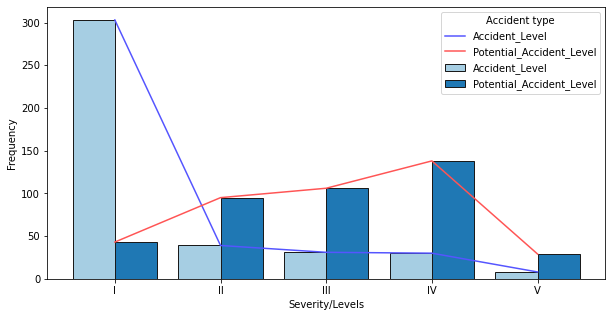

In [36]:
#plotting
plt.figure(figsize=(10,5))
sns.barplot(acc_pot['index'], acc_pot['count'], hue=acc_pot['Accident type'], palette='Paired', edgecolor='.1', saturation=1)
sns.lineplot(acc_pot['index'], acc_pot['count'], hue=acc_pot['Accident type'], palette='seismic')

plt.xlabel('Severity/Levels');
plt.ylabel('Frequency');

* Notice there is a significant difference between the severity of an incident, and the potential severity of the incident.
* If the number of accidents increases, the potential accident level decreases
* There are high number of the Level 1 accidents.
* If the Accident level increases, the potential accident level also increases

### Bivariate Analysis between the independent variables

#### Accidents Count by Country and Local

<Figure size 864x360 with 0 Axes>

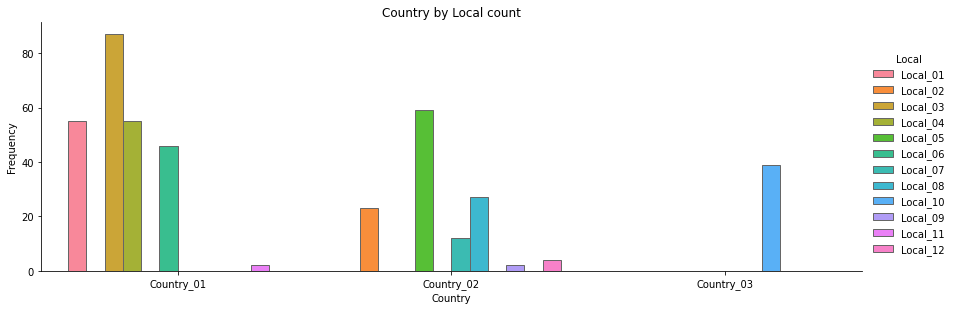

In [37]:
# Country by Local count
plt.figure(figsize=(12,5))
sns.catplot(data=df, kind='count', x='Country', hue='Local', size=4, aspect=3, edgecolor='.4', saturation=1);
plt.title('Country by Local count');
plt.ylabel('Frequency');

* Maximum number of accidents are contributed by Country_01 and the plants/locals belongs to Country_01 as we saw in the previous plots where Local_01 and Local_05 (belongs to Country_01) have the highest number of incidents

#### Accidents Count by Industry_Sector and Local

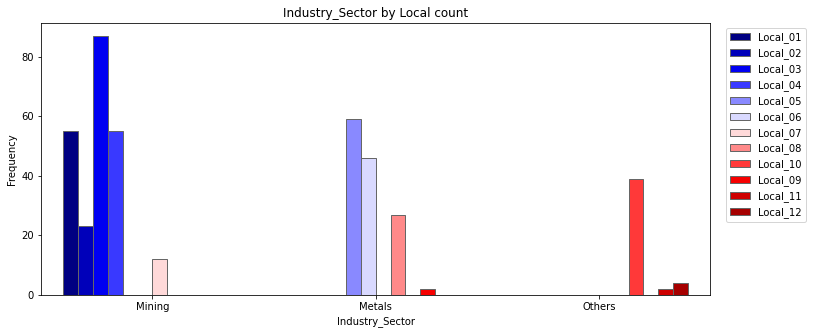

In [38]:
plt.figure(figsize=(12,5))
sns.countplot(df['Industry_Sector'], hue=df['Local'], edgecolor='.4', saturation=1, palette='seismic');
plt.title('Industry_Sector by Local count');
plt.ylabel('Frequency')
plt.legend(loc='best', bbox_to_anchor=(1.15, 1))

It can be observed that Industry Sector depends on the Local area too. 

*   Local Area 1,2,3,4 and 7 belong to Mining Sector.
*   Local Area 5,6,8 and 9 belong to Metal Sector.
*   Local Area 10, 11 and 12 belong to Other Sectors.














#### Employeee type by Gender Count
###### Since Gender is more biased towards male, we are taking ratio count with respect to other variables

In [39]:
# Filtering the dataframe by Gender and Employee type and taking the count.
df1 = df.groupby(['Gender','Employee_Type'])['Employee_Type'].count()

# 1.unstack() Function in dataframe unstacks the row to columns.
# 2.applying the row total and taking the ratio of male and female employees.
# 3.resetting the index

df1 = df1.unstack().apply(lambda x: round(x / x.sum()*100), axis=1).reset_index() 
df1 = pd.melt(df1, ['Gender']) # melt() function unpivots a DataFrame from wide format to long format
df1

,Gender,Employee_Type,value
0,Female,Employee,38.0
1,Male,Employee,43.0
2,Female,Third Party,38.0
3,Male,Third Party,44.0
4,Female,Third Party (Remote),24.0
5,Male,Third Party (Remote),13.0


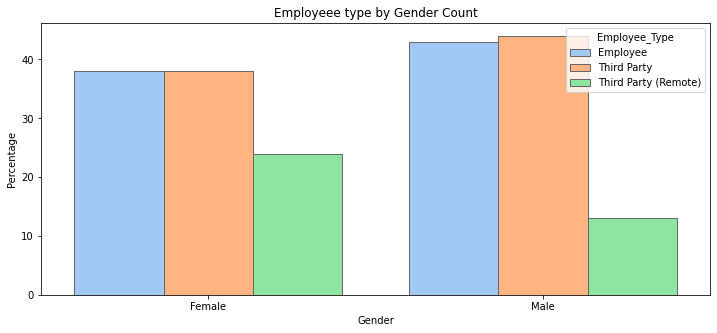

In [40]:
plt.figure(figsize=(12,5))
sns.barplot(df1['Gender'], df1['value'], hue=df1['Employee_Type'], palette='pastel', edgecolor='.4', saturation=1);
plt.title('Employeee type by Gender Count');
plt.ylabel('Percentage');

* Division of employee_type in men and women is almost same
* As seen in the above plots third party empoloyees are slightly higher than the employee count in both of the sectors(men&women)
* Proportion of female third party remote employee is moderately higher than that of the males

#### Industry_Sector by Gender Count

In [41]:
# Filtering the dataframe by Gender and Employee type and taking the count.
df1 = pd.melt(df.groupby(['Gender','Industry_Sector'])['Industry_Sector'].count().unstack().apply(lambda x: round(x / x.sum()*100), axis=1).reset_index(),['Gender'])
df1

,Gender,Industry_Sector,value
0,Female,Metals,62.0
1,Male,Metals,31.0
2,Female,Mining,19.0
3,Male,Mining,58.0
4,Female,Others,19.0
5,Male,Others,11.0


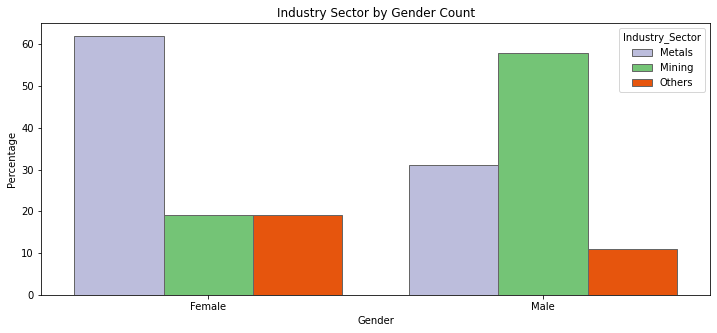

In [42]:
plt.figure(figsize=(12,5))
sns.barplot(df1['Gender'], df1['value'], hue=df1['Industry_Sector'], palette='tab20c_r', edgecolor='.4', saturation=1);
plt.title('Industry Sector by Gender Count');
plt.ylabel('Percentage');

* There is a major diferrence in mining and metals industries within males and females
* We can observe the distinct safety levels by the industry sectors towards male and female

#### Critical Risk counts by Gender

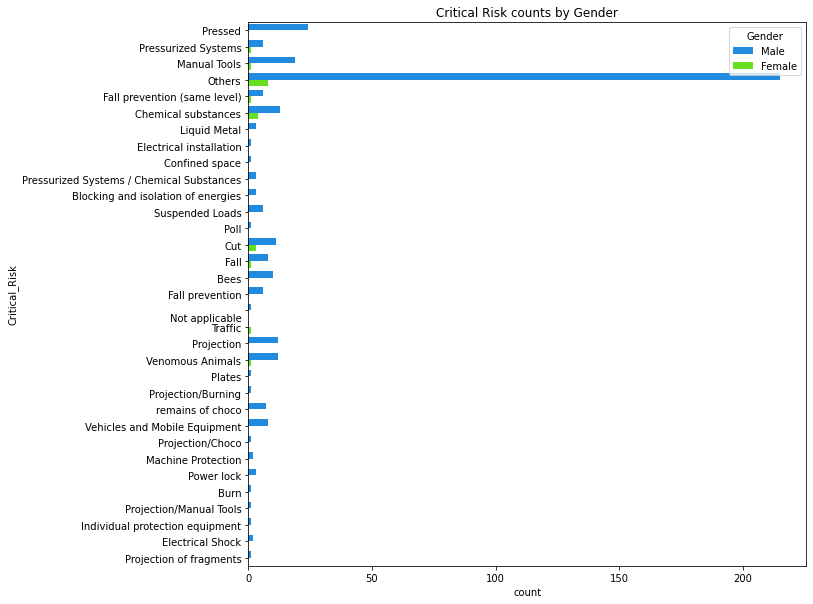

In [43]:
plt.figure(figsize=(10,10))
sns.countplot(y = df['Critical_Risk'], hue=df['Gender'], palette='gist_rainbow_r')
plt.title('Critical Risk counts by Gender');

* There are some amount of females who involved in Critical Risks such as Chemical Substances, Cut, Fall other than Others category
* As dataset has more number of male data points, the plot bars tends to increase on the same class.

## Correlation plot

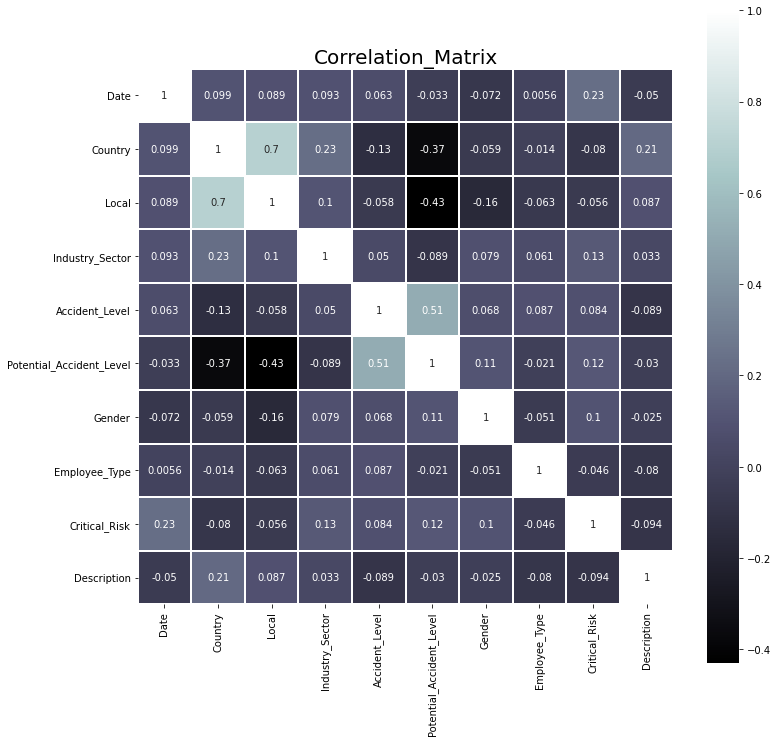

In [44]:
# Correlation
le = LabelEncoder()
df_enc = df.apply(le.fit_transform)

plt.figure(figsize=(12,12))
plt.title('Correlation_Matrix', fontsize=20)
sns.heatmap(df_enc.corr(), square=True, cmap='bone', annot=True, linewidth=0.2);

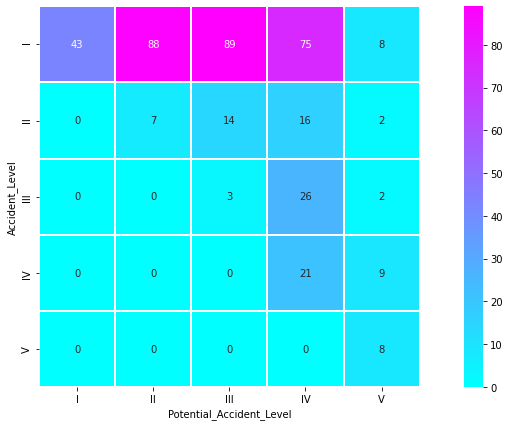

In [45]:
# Count of Accidents grouped by Accident Level and Potential accident level
plt.figure(figsize = (16,7))
sns.heatmap(pd.crosstab(df.Accident_Level, df.Potential_Accident_Level), square=True, cmap='cool', annot=True, linewidth=0.1);

* There is a moderate correleation among the values of both variables.
<!-- * Accident_Level_I is highly positively correlated with most of the Potential_Accident_Levels which indicates minor incidents have the potential to cause severe accident levels in an industry.😥 -->



In [46]:
# Count of Critical Risks grouped by Industry sectors
df.pivot_table(index='Critical_Risk', columns='Industry_Sector', aggfunc='count').fillna(0)['Accident_Level'].T

Critical_Risk,\nNot applicable,Bees,Blocking and isolation of energies,Burn,Chemical substances,Confined space,Cut,Electrical Shock,Electrical installation,Fall,...,Projection,Projection of fragments,Projection/Burning,Projection/Choco,Projection/Manual Tools,Suspended Loads,Traffic,Vehicles and Mobile Equipment,Venomous Animals,remains of choco
Industry_Sector,,,,,,,,,,,,,,,,,,,,,
Metals,1.0,0.0,3.0,1.0,15.0,1.0,10.0,0.0,0.0,2.0,...,4.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0
Mining,0.0,0.0,0.0,0.0,2.0,0.0,4.0,2.0,1.0,5.0,...,8.0,1.0,0.0,0.0,1.0,1.0,0.0,8.0,1.0,7.0
Others,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.0,0.0


<a id="multivariate-analysis"></a>
## Multivariate Analysis

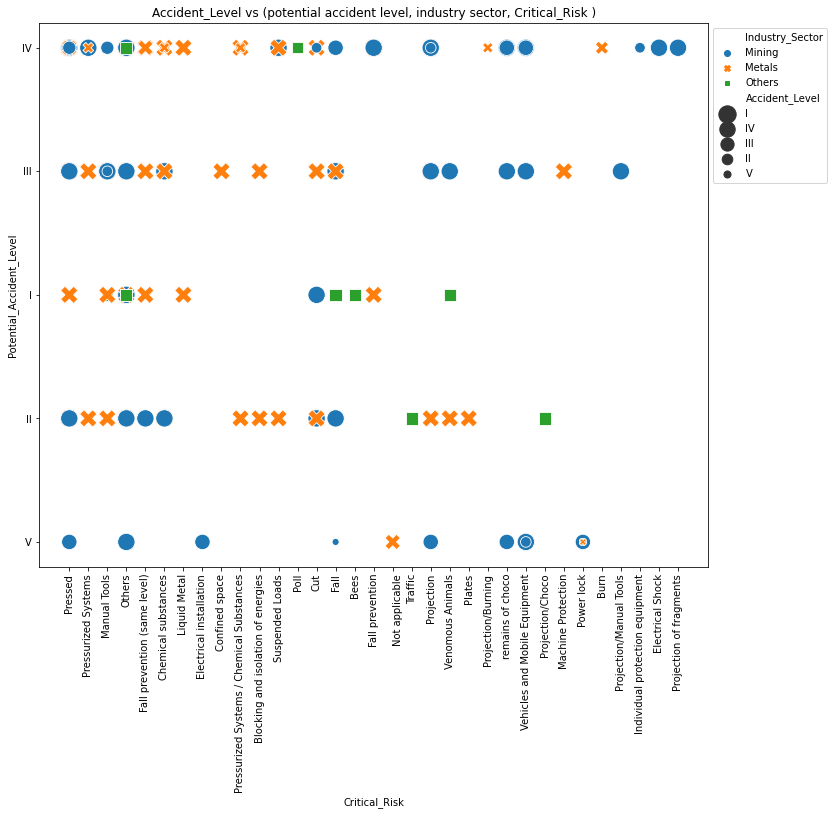

In [47]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(y="Potential_Accident_Level", x="Critical_Risk", hue="Industry_Sector",style='Industry_Sector',
                size = 'Accident_Level',  data=df, ax=ax, sizes=(50, 300), palette = 'tab10')
ax.set_title("Accident_Level vs (potential accident level, industry sector, Critical_Risk )")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xticks(rotation = 'vertical');
plt.show()

* Out of all industries, Mining Industry has had most severe accidents and their corresponding potential Accident level is also high.
* Most of the accidents have been reported from mining industry and almost all of them are of moderate level, followed by Metal industry and Others.
* The Potential accident level and Accident level are equivalent to each other.
Some of the critical risks are less severe and have reported maximum number of accidents.

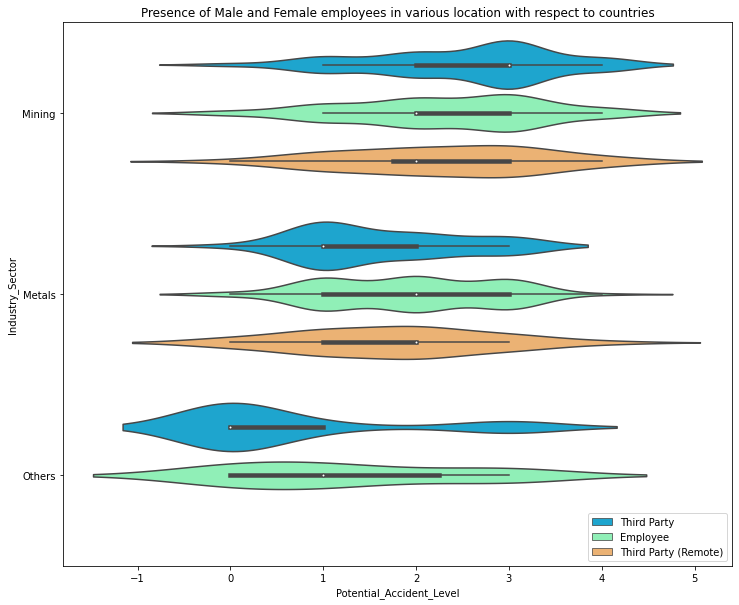

In [48]:
df1 = df.copy()
df1['Potential_Accident_Level'] = LabelEncoder().fit_transform(df1['Potential_Accident_Level']).astype(np.int8) # Just converting one of the column to numerical data type

plt.figure(figsize=(12,10))
sns.violinplot(x=df1["Potential_Accident_Level"], y=df1["Industry_Sector"], hue = df1['Employee_Type'] ,palette='rainbow');
plt.title("Presence of Male and Female employees in various location with respect to countries")
plt.legend(loc='lower right')

* For metals industry, the distribution of potential accident level for third party employee is right skewed, that means most of the accidents have moderate risk.

* For Direct employee, there is an equal distribution between low and moderate risk.
Same for Third party remote employees, but it is long tailed.

* For other industries, most of the third party employees are affected by very low risk which is a good sign.

* Similarly, for Direct employees the potential accident level is distributed well and the mode of the distribution is located at a low risk level (with a very extended inter quartile range).
* No data is available for Third party remote employees who belong to industries.

## Time Series Analysis

#### Here we have a data in a series of particular time periods or intervals as it has a time component. Hence let's do some analysis

### Accident Level counts by Year

In [49]:
# Convert string Date time into Python Date time object. 
df['Date'] = pd.to_datetime(df.Date)

In [50]:
# Accidents may increase or decrease throughout the year or month, so we are adding datetime features such as year and month
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df['Day'] = df.Date.dt.day
df['Weekday'] = df.Date.dt.weekday

# df.drop(columns =['Date'], inplace = True)

Text(0.5, 1.0, 'Number of Accidents/Day (all countries)')

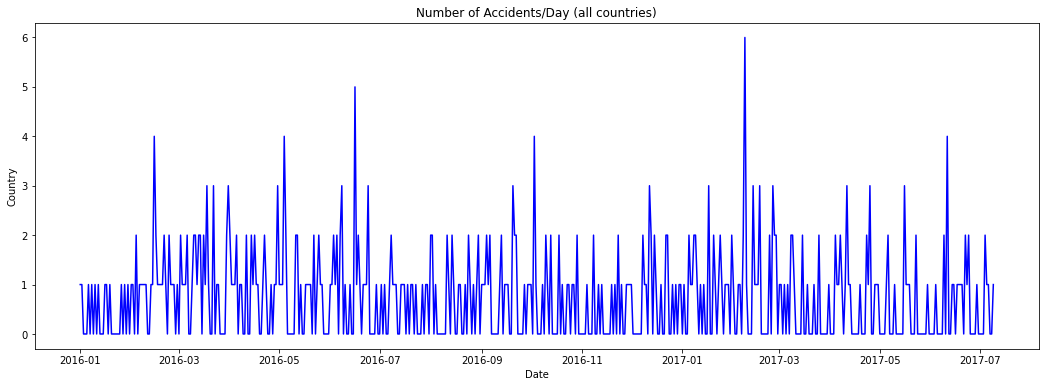

In [51]:
# Basic trend plot accumulating accidents of all the countries day wise
df.set_index('Date', inplace=True)
df1= df.Country.resample('24H').count()
                        
plt.figure(figsize=(18,6))
sns.lineplot(x = df1.index, y = df1, color='blue')
plt.title('Number of Accidents/Day (all countries)')

* It can be noticed that there are multiple peaks of accidents every year. There is a high peak in February of 2017


Months in 2016: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months in 2017: [1 2 3 4 5 6 7]


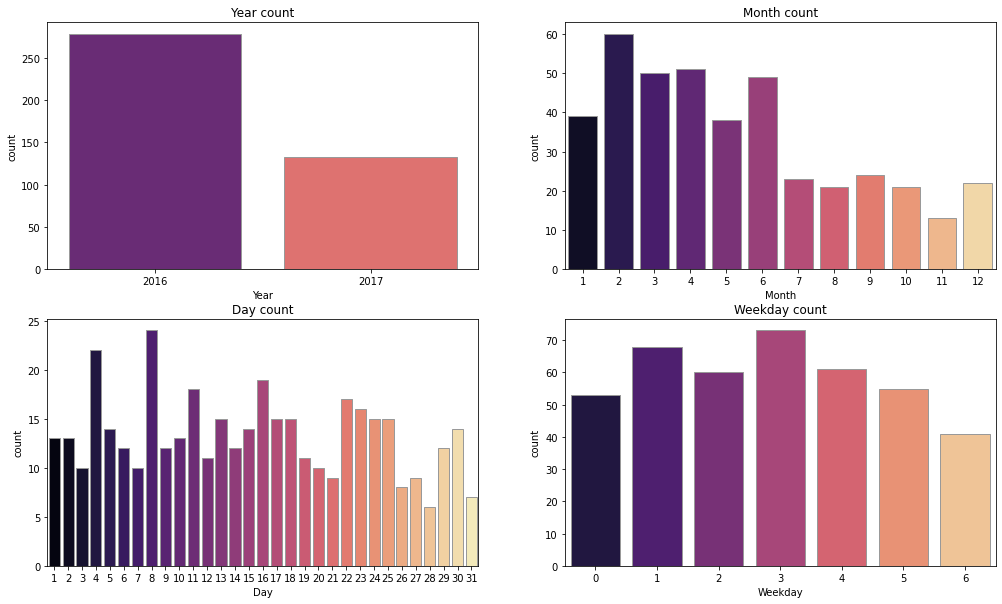

In [52]:
k=1
plt.figure(figsize=(17,10))

# using for loop to iterate over defined columns in the dataframe and create the plot

for col in df[['Year', 'Month', 'Day', 'Weekday']]:
    plt.subplot(2,2,k)
    sns.countplot(df[col], palette='magma',edgecolor = '.6', alpha = 1.0)
    # sns.lineplot(df[col].value_counts().index, df[col].value_counts().values, palette='seismic')
    plt.title(col+' count')
    k=k+1

print('Months in 2016:',df[df['Year']==2016]['Month'].unique())
print('Months in 2017:',df[df['Year']==2017]['Month'].unique())

# pd.DataFrame(df[df['Year']==2016]['Month']).value_counts().sort_index()
# pd.DataFrame(df[df['Year']==2017]['Month']).value_counts().sort_index()

* It can be observed that more number of accidents occured in 2016 compared to 2017, in year 2016 we have all 12 months of data whereas year 2017 has only 7 months of data.
* It seems that the number of accidents decreased in latter of the year / month.
* The number of accidents increased during the middle of the week and declined since the middle of the week.

### Potential Accident level counts by Month



Text(0.5, 0, 'Month')

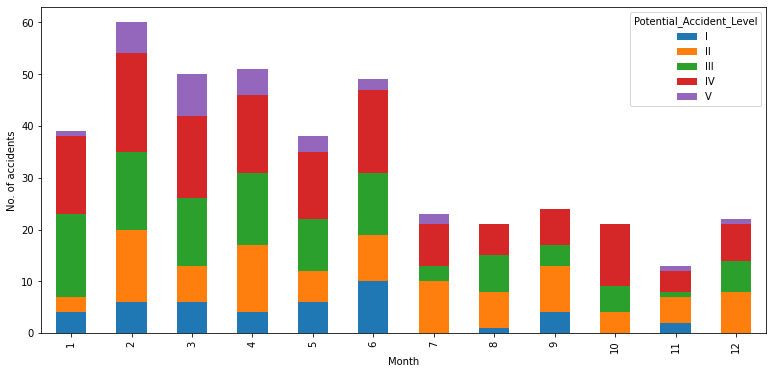

In [53]:
ct = pd.crosstab(columns=df["Potential_Accident_Level"],index=df["Month"])
ax = ct.plot(kind="bar",stacked=True,figsize=(13,6))
ax.set_ylabel('No. of accidents')
ax.set_xlabel('Month')

* Accident level have the tendency that non-severe levels(I,II) decreased throughout the year but severe(III, IV) levels did not change much.
* Initial months see more accidents which seem to decrease by year end
* High level accidents(V) occur in the initial months

In [54]:
# Removing the columns which are not required for modelling
df = df.reset_index()
df.drop(columns=['Date', 'Day', 'Weekday', 'Year', 'Month'], inplace= True)

In [55]:
df

,Country,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...
406,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
407,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
408,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
409,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


<a id="nlp-pre-processing"></a>
## 6. NLP Pre-processing

Description about accidents is important to understand the cause of accidents, so we need to discover characteristical words or phrases indicating situation.

In [56]:
df['Description'][0]

'While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.'

## Cleaning the text

In [57]:
stopwords = set(stopwords.words("english"))

In [58]:
# Defining a function for NLP preprocessing
def des_cleaning(text):

    # Initialize the object for Lemmatizer class
    lemmatizer = nltk.stem.WordNetLemmatizer()

    # Set the stopwords to English
    stopwords = nltk.corpus.stopwords.words('english')

    # Normalize the text in order deal with accented words and unicodes
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    # Consider only alphabets and numbers from the text
    words = re.sub(r'[^a-zA-Z.,!?/:;\"\'\s]', '', text).split()

    # Consider the words which are not in stopwords of english and lemmatize them
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lems = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]

    # #remove non-alphabetical characters like '(', '.' or '!'
    # alphas = [i for i in lems if (i.isalpha() or i.isnumeric()) and (i not in stopwords)]

    words = [w for w in lems if len(w)>2]

    return words

In [59]:
# Apply all the preprocessing techniques we have defined on Description columns
tokens = des_cleaning(' '.join(df['Description'].sum().split()))
# words = des_cleaning(''.join(str(df['Description'].tolist())))

In [60]:
# Verifying by printing first 20 words
print('Length of all the words:', len(tokens),'\n')
print('Length of unique tokens in the dataset:', len(np.unique(tokens)),'\n')
np.array(tokens[0:20])

Length of all the words: 13192 

Length of unique tokens in the dataset: 3799 



array(['removing', 'drill', 'rod', 'jumbo', 'maintenance,', 'supervisor',
       'proceeds', 'loosen', 'support', 'intermediate', 'centralizer',
       'facilitate', 'removal,', 'seeing', 'mechanic', 'support', 'one',
       'end', 'drill', 'equipment'], dtype='<U12')

In [61]:
df['NewDescription'] = df.apply(lambda x: " ".join(des_cleaning(x.Description)), axis=1)

In [62]:
df['NewDescription'][0]

'removing drill rod jumbo maintenance, supervisor proceeds loosen support intermediate centralizer facilitate removal, seeing mechanic support one end drill equipment pull hand bar accelerate removal this, moment bar slide point support tightens finger mechanic drilling bar beam jumbo.'

## N-grams

In [63]:
# Function to calculate ngrams
def extract_ngrams(data, num):
  # Taking ngrams on Description column text and taking the value counts of each of the tokens
  words_with_count  = nltk.FreqDist(nltk.ngrams(data, num)).most_common(30) # taking top 30 most common words

  # Creating the dataframe the words and thier counts
  words_with_count = pd.DataFrame(words_with_count, columns=['Words', 'Count'])

  # Removing the brackets and commans
  words_with_count.Words = [' '.join(i) for i in words_with_count.Words]

  # words_with_count.index = [' '.join(i) for i in words_with_count.Words]
  words_with_count.set_index('Words', inplace=True) # setting the Words as index

  # Returns the dataframe which contains unique tokens ordered by their counts 
  return words_with_count

In [64]:
# Uni-Grams
uni_grams = extract_ngrams(tokens, 1)

# Printing top words with their counts
uni_grams[0:10]

,Count
Words,
causing,164
left,151
right,151
hand,123
employee,122
operator,121
time,108
moment,87
activity,75


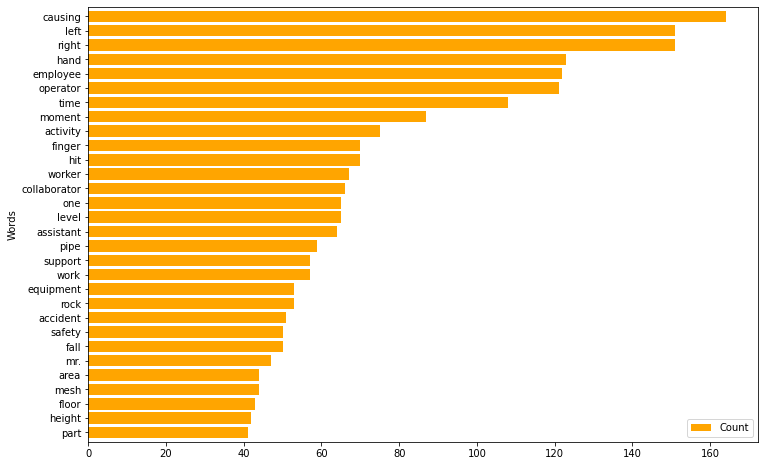

In [65]:
# Visualising the ngrams
uni_grams.sort_values(by='Count').plot.barh(color = 'orange', width = 0.8, figsize = (12,8));

* Causing is the most frequent word. 
* There are several nouns like pipe, collaborator, time etc. 
* Most accidents involved the hands of the persons involved.
* Moreover there are other words which depict some sort of action (verbs). For example hit, remove, fall move...etc

In [66]:
# Bi-Grams
bi_grams = extract_ngrams(tokens, 2)

# Printing the words with their counts
bi_grams[0:10]

,Count
Words,
left hand,45
right hand,40
time accident,37
finger left,25
causing injury,23
fragment rock,15
"time accident,",15
medical center,15
finger right,14


Most injuries involved hands as seen earlier

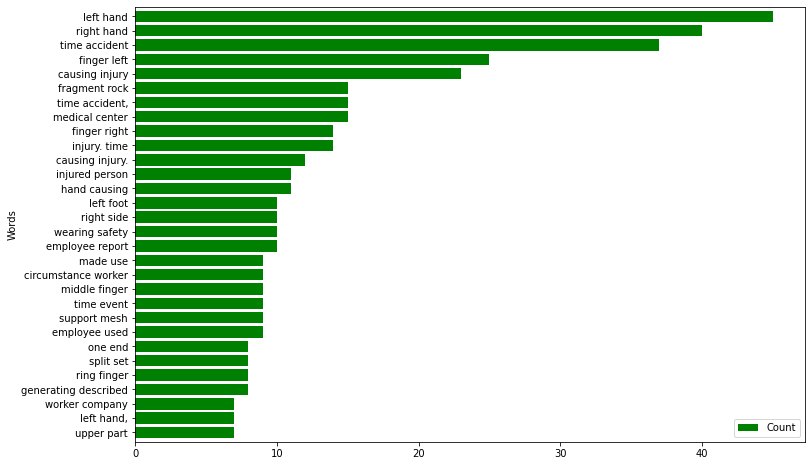

In [67]:
bi_grams.sort_values(by='Count').plot.barh(color = 'green', width = 0.8, figsize = (12,8));

* There are many phrases which is related to hands. For example hand causing, left hand, right hand, finger left, finger right, middle finger and ring finger.
* There are also some phrases which is related to other body parts. For example left foot and right side.

In [68]:
# tri-Grams
tri_grams = extract_ngrams(tokens, 3)

# Printing the words with their counts
tri_grams[0:10]

,Count
Words,
finger left hand,12
injury. time accident,10
finger right hand,9
time accident employee,6
worker wearing safety,5
time accident worker,5
causing injury. time,5
hit back right,4
wearing safety glove,4


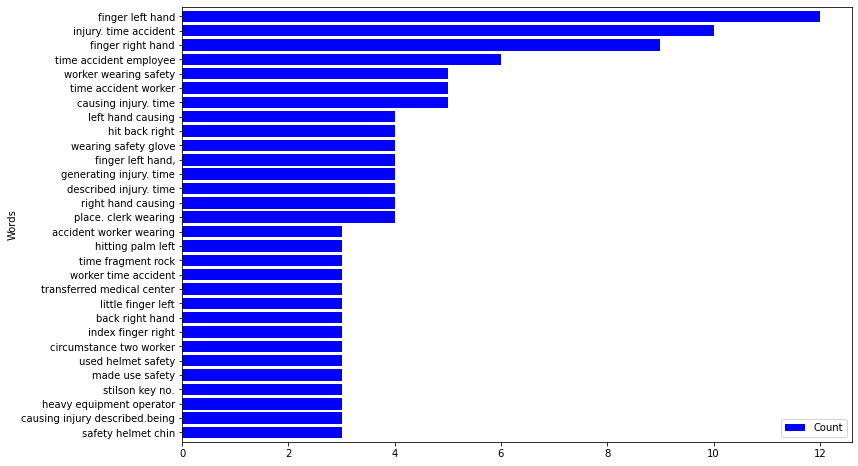

In [69]:
tri_grams.sort_values(by='Count').plot.barh(color = 'blue', width = 0.8, figsize = (12,8));

* Like Unigram and Bigram, there are also many phrases which is related to hands or other body parts, but increasing the grams makes sense
* For example left/right hand finger, left hand causing, hit back right and wearing safety glove.. etc.

#### Ngram with Industry column

In [70]:
# Dividing the tokens with respect to Industry Sector from the description text
tokens_metals = des_cleaning(' '.join(df[df.Industry_Sector=='Metals']['Description'].sum().split()))
tokens_mining = des_cleaning(' '.join(df[df.Industry_Sector=='Mining']['Description'].sum().split()))

In [71]:
print('Total number of words in Metals category:', len(tokens_metals))
print('Total number of words in Mining category:',len(tokens_mining))

Total number of words in Metals category: 2902
Total number of words in Mining category: 8376


In [72]:
# Extracting unigrams on metals category
unigrams_metals = extract_ngrams(tokens_metals, 1).reset_index()

# Extracting unigrams on mining category
unigrams_mining = extract_ngrams(tokens_mining, 1).reset_index()

unigrams_metals.join(unigrams_mining, lsuffix='_Metals', rsuffix='_Mining')

,Words_Metals,Count_Metals,Words_Mining,Count_Mining
0,employee,50,causing,103
1,left,46,right,100
2,causing,43,operator,96
3,right,37,time,96
4,hit,27,left,92
5,hand,25,hand,88
6,operator,25,moment,62
7,activity,25,level,60
8,medical,24,assistant,59
9,report,23,worker,53


#### Ngram with Gender column

In [73]:
# Dividing the tokens of male and female category from the description text
tokens_male = des_cleaning(' '.join(df[df.Gender=='Male']['Description'].sum().split()))
tokens_female = des_cleaning(' '.join(df[df.Gender=='Female']['Description'].sum().split()))

In [74]:
print('Total number of words in Male category:', len(tokens_male))
print('Total number of words in Female category:',len(tokens_female))

Total number of words in Male category: 12810
Total number of words in Female category: 383


In [75]:
# Extracting unigrams on male category
unigrams_male = extract_ngrams(tokens_male, 1).reset_index()

# Extracting unigrams on female category
unigrams_female = extract_ngrams(tokens_female, 1).reset_index()

# Joining both the dataframes
uni_male_female = unigrams_male.join(unigrams_female, lsuffix='_Male', rsuffix='_Female')

#------------------------------------------------------------------------------------------

# Extracting bigrams on male category
bigrams_male = extract_ngrams(tokens_male, 2).reset_index()

# Extracting unigrams on female category
bigrams_female = extract_ngrams(tokens_female, 2).reset_index()

# Joining both the dataframes
bi_male_female = bigrams_male.join(bigrams_female, lsuffix='_Male', rsuffix='_Female')
print(bi_male_female)

              Words_Male  Count_Male         Words_Female  Count_Female
0              left hand          43           pump house             2
1             right hand          40         nitric acid,             2
2          time accident          37            left hand             2
3            finger left          24      due overheating             1
4         causing injury          22      overheating bar             1
5          fragment rock          15              bar row             1
6         time accident,          15             row cell             1
7         medical center          15           cell spark             1
8           finger right          14      spark produced,             1
9           injury. time          14  produced, projected             1
10       causing injury.          12    projected manages             1
11        injured person          11        manages reach             1
12            right side          10          reach chief       

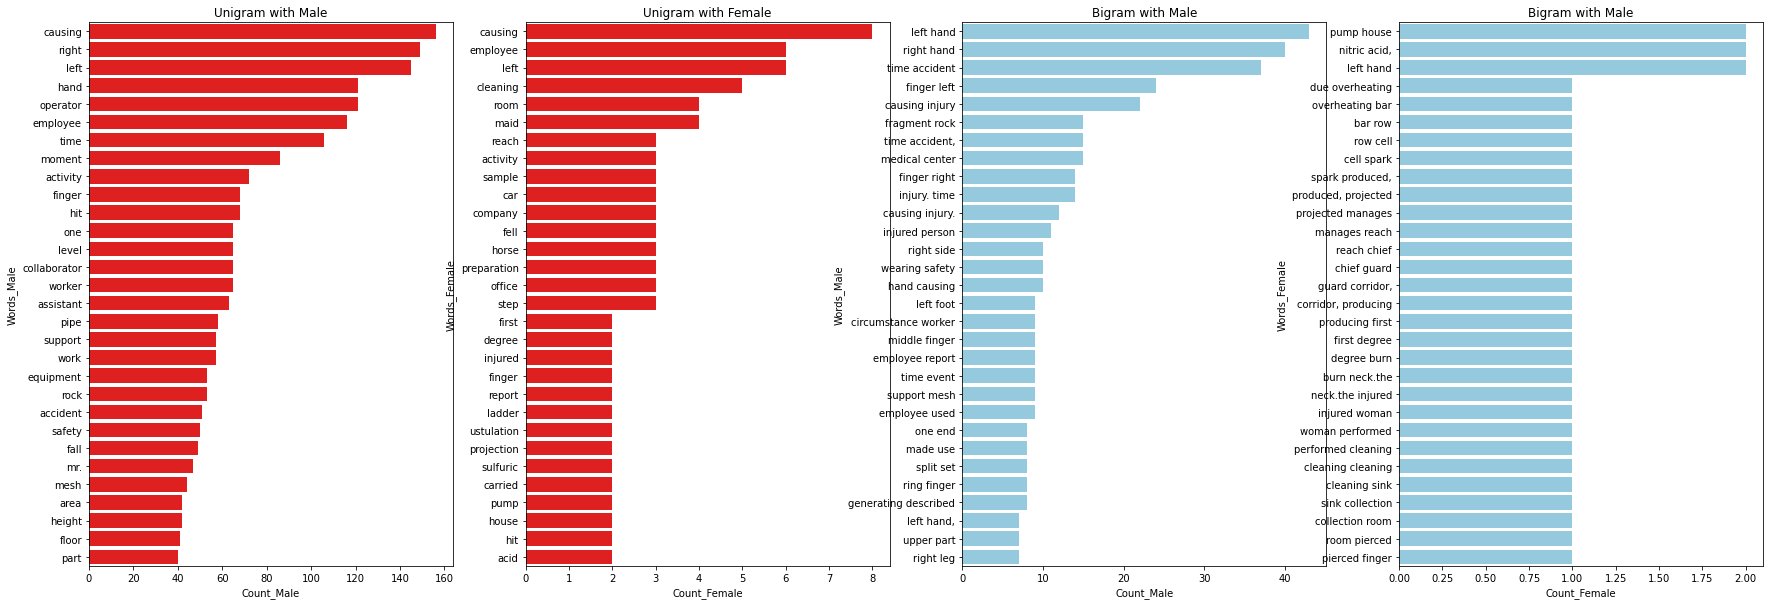

In [76]:
fig, axes = plt.subplots(1,4, figsize=(30, 10))

sns.barplot(y = uni_male_female['Words_Male'], x = uni_male_female['Count_Male'], ax=axes[0], color='red');
axes[0].set_title('Unigram with Male');

sns.barplot(y = uni_male_female['Words_Female'], x = uni_male_female['Count_Female'], ax=axes[1], color='red');
axes[1].set_title('Unigram with Female');

sns.barplot(y = bi_male_female['Words_Male'], x = bi_male_female['Count_Male'], ax=axes[2], color='skyblue');
axes[2].set_title('Bigram with Male');

sns.barplot(y = bi_male_female['Words_Female'], x = bi_male_female['Count_Female'], ax=axes[3], color='skyblue');
axes[3].set_title('Bigram with Male');

## Word Cloud

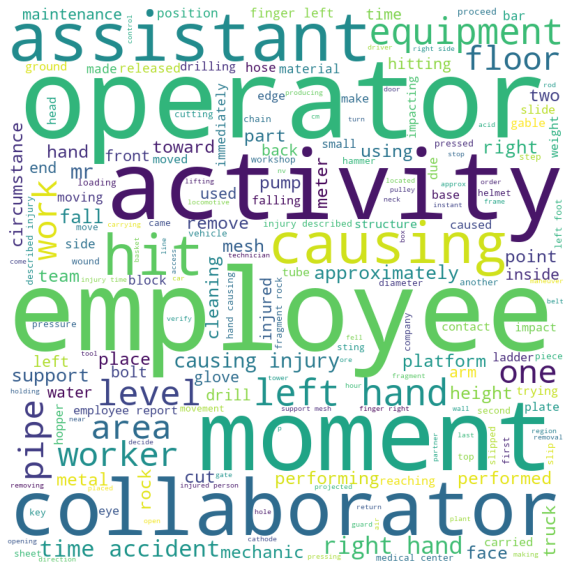

In [77]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(des_cleaning(' '.join(df['Description'].sum().split()))))

plt.figure(figsize = (10, 15), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
  
plt.show()

* As same as the Ngram analysis above, there are many hand-related and movement-related words.
* Hand-related: left, right, hand, finger, and glove
* Movement-related: fall, hit, carry, lift and slip

## POS Tagging

In [78]:
blob = TextBlob(str(df['NewDescription']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.head()

NN     35
CD     11
RB      6
JJ      6
VBG     4
Name: pos, dtype: int64

<AxesSubplot:>

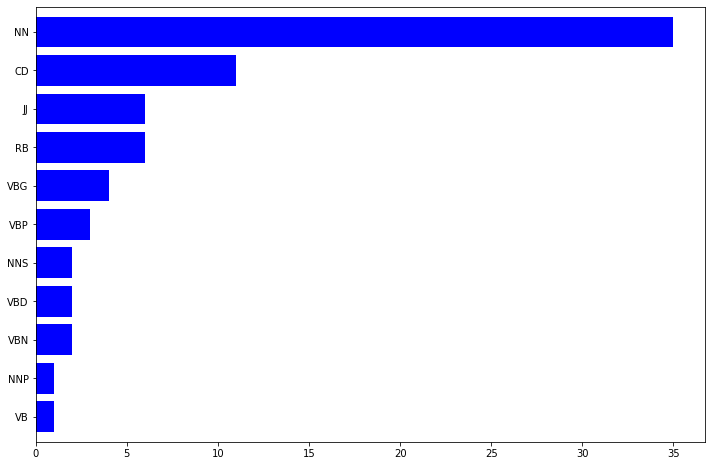

In [79]:
pos_df.sort_values().plot.barh(color = 'blue', width = 0.8, figsize = (12,8))

Some Examples:

NN - noun

NNP - proper noun

NNS - noun plural

CD - cardinal digit

DT - determiner

VB - verb

JJ - adjective

RB - adverb

VB -	verb

VBD	- verb past tense...etc

## EDA Summary:



**Local**
* Highest manufacturing plants are located in Local_03 city and lowest in Local_09 city.

**Country**
* Percentage(%) of accidents occurred in respective countries: 59% in Country_01, 31% in Country_02 and 10% in Country_03.

**Industry Sector**
* Percentage(%) of manufacturing plants belongs to respective sectors: 57% to Mining sector, 32% to Metals sector and 11% to Others sector.

**Country + Industry Sector**
* Metals and Mining industry sector plants are not available in Country_03.
* Distribution of industry sector differ significantly in each country.

**Accident Levels**
* The number of accidents decreases as the Accident Level increases and increases as the Potential Accident Level increases.

**Gender**
* There are more men working in this industry as compared to women.

**Employee type**
* 44% Third party empoyees, 43% own empoyees and 13% Third party(Remote) empoyees working in this industry.

**Gender + Employee type**
* Proportion of third party employees in each gender is equal, third party(remote) employees in each gender is not equal and 
own employees in each gender is not equal.

**Gender + Industry Sector**
* Proportion of Metals, Mining and Others sector employees in each gender is not equal

**Gender + Accident Levels**
* Males have a higher accident levels than females.
* There are many low risks at general accident level, but many high risks at potential accident level.

**Accident Levels + Employee type**
* For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be 
slightly higher at high accident levels.

**Accident Levels + Calendar**
* Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.
* Number of accidents are high in beginning of the year and it keeps decreasing later.
* Number of accidents are very high in particular days like 4, 8 and 16 in every month.
* Number of accidents increased during the middle of the week and declined since the middle of th week.

* Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, 
and some of these levels increased slightly in the second half of the year.
* Both of the two accident level is thought that non-severe levels decreased in the first and the last of the week, but severe levels did not 
changed much.

**Critical Risk**
* Most of the critical risks are classified as Others.

[Table of Contents](#table-of-contents)